<a href="https://colab.research.google.com/github/patelmedha/Stroke-Prediction/blob/main/Stroke_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STROKE PREDICTION

In [263]:
#Imports
## Pandas
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Numpy
import numpy as np

##Seaborn
import seaborn as sns

##Matplotlib
import matplotlib.pyplot as plt

from sklearn import set_config
set_config(transform_output='pandas')

# Stroke Prediction
**Context**
  - According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
  

1. Source of data
  - Source : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

2. Brief description of data
 - - This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

3. What is the target?
  - Target column is stroke. Predicting whether patient will suffer from a stroke or not.
   

4. What does one row represent? (A person? A business? An event? A product?)

    - **Attribute Information**
  1. id: unique identifier
  2. gender: "Male", "Female" or "Other"
  3. age: age of the patient
  4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
  5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
  6. ever_married: "No" or "Yes"
  7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
  8. Residence_type: "Rural" or "Urban"
  9. avg_glucose_level: average glucose level in blood
  10. bmi: body mass index
  11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
  12. stroke: 1 if the patient had a stroke or 0 if not
  
  *Note: "Unknown" in smoking_status means that the information is unavailable for this patient

5. Is this a classification or regression problem?
  - Classification problem

6. How many features does the data have?
  - 11 features

7. How many rows are in the dataset?
  - 5110 rows

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
  - This data  has 201 missing values in the BMI column.

## Load Data and Inspect Data

In [264]:
#Load Data
from google.colab import drive
drive.mount('/content/drive')

stroke_fpath = '/content/drive/MyDrive/CodingDojo/PROJECT 2/healthcare-dataset-stroke-data.csv'
df_stroke = pd.read_csv(stroke_fpath)
df_stroke.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [265]:
#Display number of rows and columns for the dataframe
print(f'There are {df_stroke.shape[0]} rows, and {df_stroke.shape[1]} columns.')
print(f'The rows represent {df_stroke.shape[0]} observations, and the columns represent {df_stroke.shape[1]-1} features and 1 target variable.')


There are 5110 rows, and 12 columns.
The rows represent 5110 observations, and the columns represent 11 features and 1 target variable.


In [266]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


###Duplicated Data

In [267]:
#Duplicate Rows
df_stroke.duplicated().sum().sum()

0

- There are no duplicate rows to drop.

### Missing Values

In [268]:
#Missing values
df_stroke.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [269]:
#Missing Values in Percent
df_stroke.isna().sum()/100

id                   0.00
gender               0.00
age                  0.00
hypertension         0.00
heart_disease        0.00
ever_married         0.00
work_type            0.00
Residence_type       0.00
avg_glucose_level    0.00
bmi                  2.01
smoking_status       0.00
stroke               0.00
dtype: float64

<Axes: >

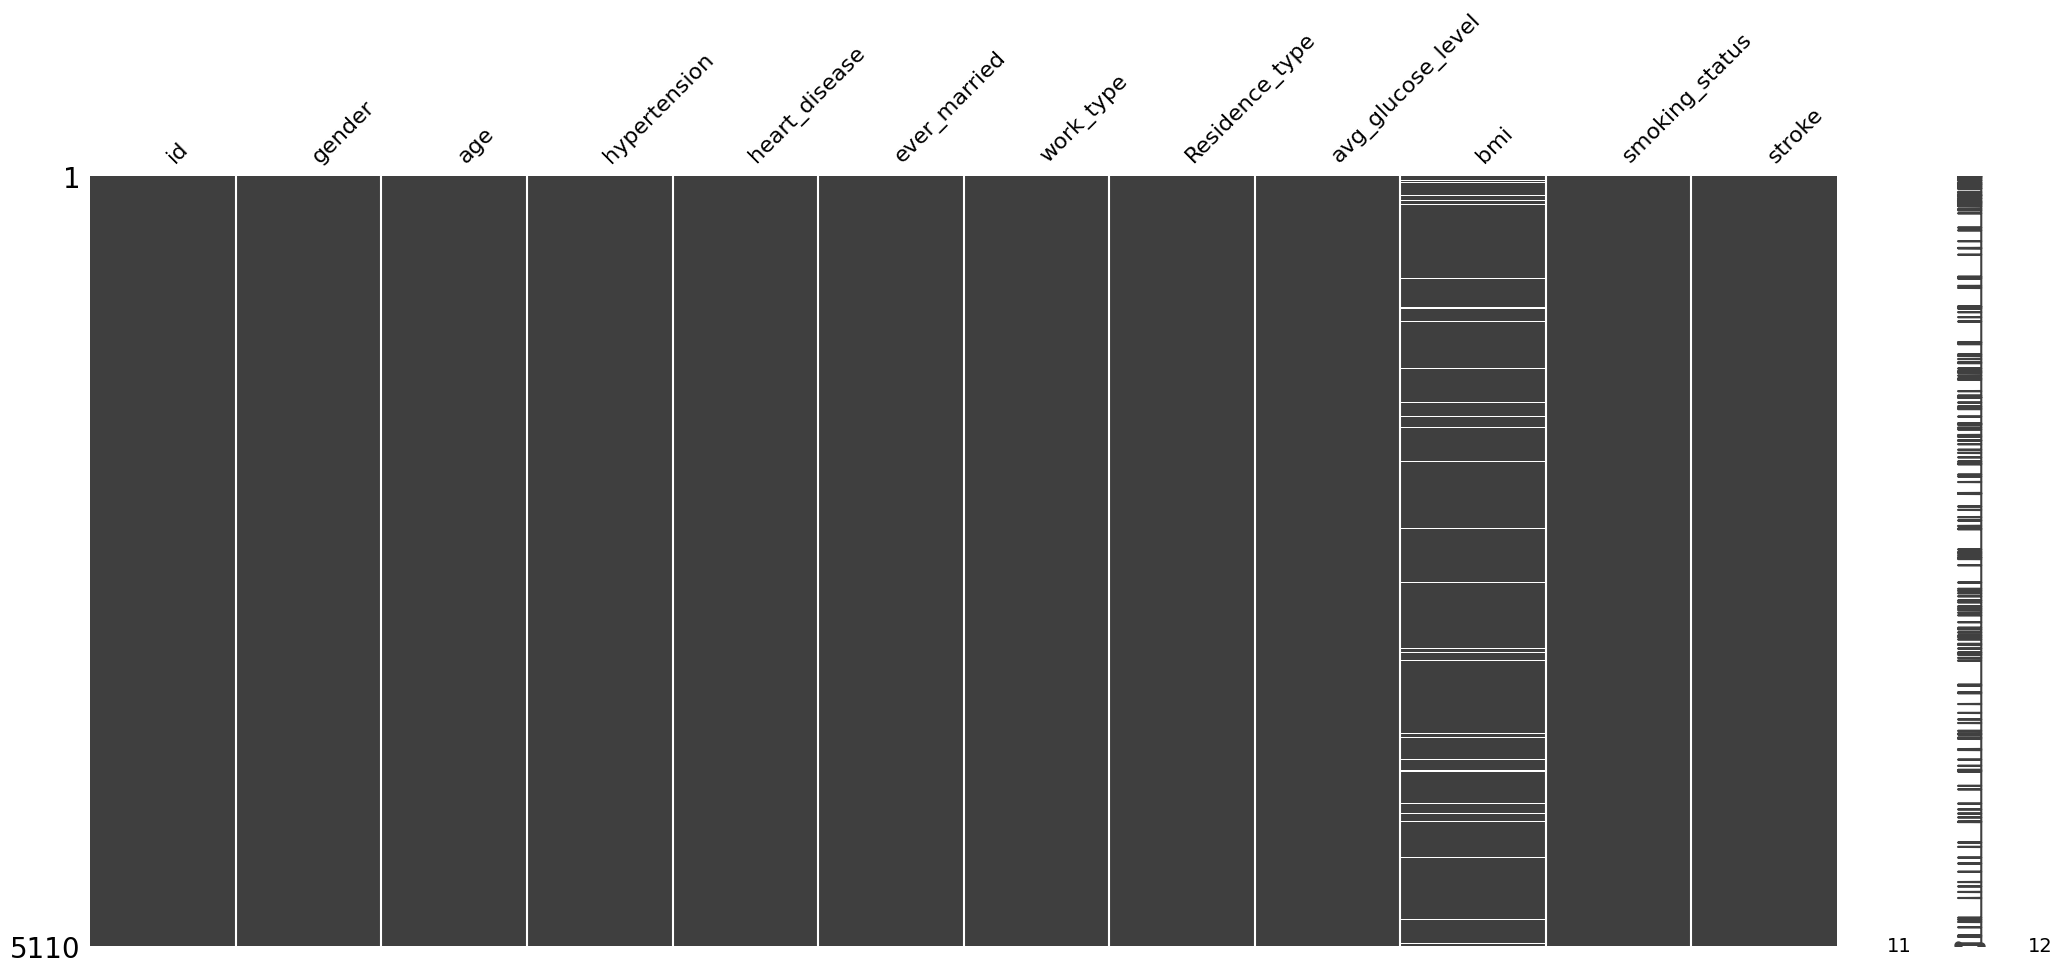

In [270]:
#Visualizing Missing Values with Missingno
import missingno as msno
msno.matrix(df_stroke)

- BMI - 2.01% missing values
  - Dropping these rows can be justified since less than 5% data is missing.

In [271]:
df_stroke.dropna(subset=['bmi'],inplace=True)

In [272]:
#Missing Values in Percent
df_stroke.isna().sum()/100

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

### Unique Values

In [273]:
df_stroke.nunique()

id                   4909
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [274]:
df_stroke.nunique()/len(df_stroke) * 100


id                   100.000000
gender                 0.061112
age                    2.118558
hypertension           0.040741
heart_disease          0.040741
ever_married           0.040741
work_type              0.101854
Residence_type         0.040741
avg_glucose_level     78.468120
bmi                    8.514972
smoking_status         0.081483
stroke                 0.040741
dtype: float64

- id column has 100% unique values- this column can be dropped.

In [275]:
df_stroke.drop(columns= 'id', inplace=True)
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


### Data Consistency

#### Categorical Columns

In [276]:
#Save list for categorical column name.
cat_col = df_stroke.select_dtypes('object').columns
cat_col

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [277]:
#Check for nunique for categorical columns
for col in cat_col:
  print(f'Value Counts for {col}')
  print(df_stroke[col].value_counts())
  print('\n')


Value Counts for gender
Female    2897
Male      2011
Other        1
Name: gender, dtype: int64


Value Counts for ever_married
Yes    3204
No     1705
Name: ever_married, dtype: int64


Value Counts for work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64


Value Counts for Residence_type
Urban    2490
Rural    2419
Name: Residence_type, dtype: int64


Value Counts for smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64




#### Numeric Columns

In [278]:
#Save list for numeric column name.
num_col = df_stroke.select_dtypes(['int', 'float']).columns
num_col

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [279]:
#Check for nunique for categorical columns
for col in num_col:
  print(f'Value Counts for {col}')
  print(df_stroke[col].value_counts())
  print('\n')

Value Counts for age
78.00    93
57.00    93
52.00    85
54.00    84
55.00    83
         ..
1.40      3
0.16      3
0.40      2
0.08      2
0.48      2
Name: age, Length: 104, dtype: int64


Value Counts for hypertension
0    4458
1     451
Name: hypertension, dtype: int64


Value Counts for heart_disease
0    4666
1     243
Name: heart_disease, dtype: int64


Value Counts for avg_glucose_level
93.88     6
72.49     5
83.16     5
73.00     5
91.68     5
         ..
72.06     1
97.90     1
230.59    1
224.63    1
85.28     1
Name: avg_glucose_level, Length: 3852, dtype: int64


Value Counts for bmi
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64


Value Counts for stroke
0    4700
1     209
Name: stroke, dtype: int64




#### Summary Statistic for Numeric Columns
  - For any numeric columns obtain the summary statistics of each(min,max,mean).

In [280]:
#Descriptive Summary for numerical columns
df_stroke.describe(include='number')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Exploratory Data Analysis

##### Categorical Columns


###### EDA function for Categorical Columns

In [281]:
#Using EDA function from the LP
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None, rot1 = 45):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation= rot1, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

###### 'gender'

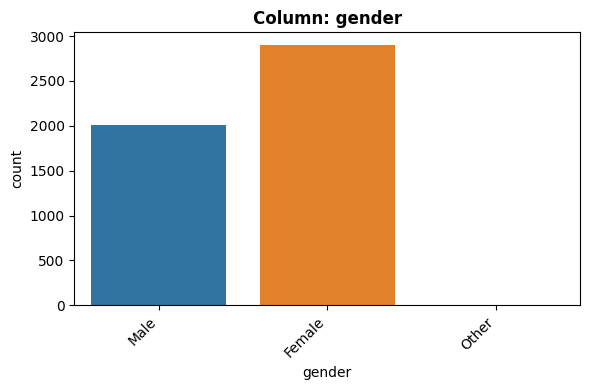

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Female' occurs 2897 times (59.01%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: gender'}, xlabel='gender', ylabel='count'>)

In [282]:
explore_categorical(df_stroke, 'gender')

###### 'ever_married'

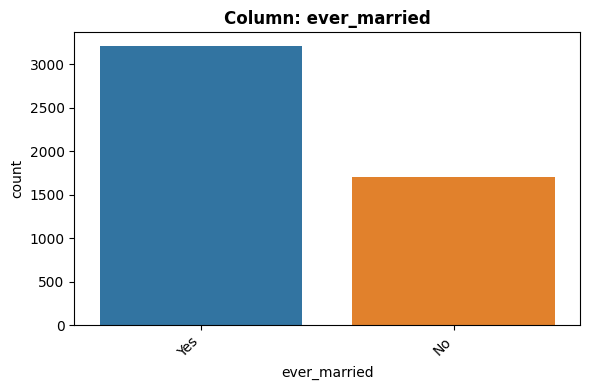

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Yes' occurs 3204 times (65.27%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: ever_married'}, xlabel='ever_married', ylabel='count'>)

In [283]:
explore_categorical(df_stroke, 'ever_married')

###### 'work_type'

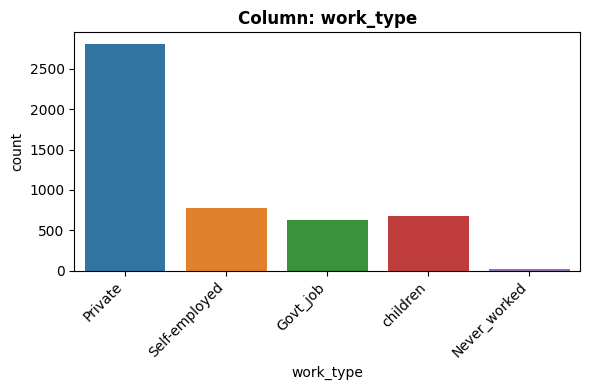

- NaN's Found: 0 (0.0%)
- Unique Values: 5
- Most common value: 'Private' occurs 2811 times (57.26%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: work_type'}, xlabel='work_type', ylabel='count'>)

In [284]:
explore_categorical(df_stroke, 'work_type')

###### 'Residence_type'

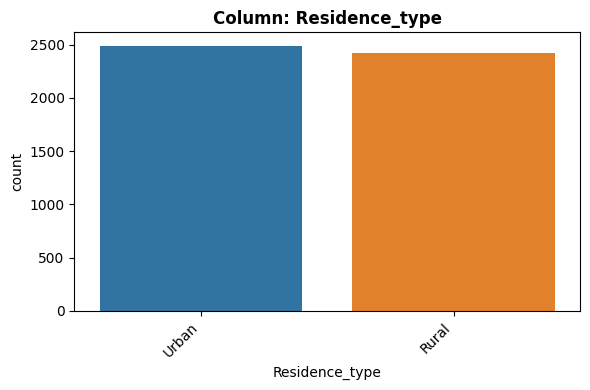

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Urban' occurs 2490 times (50.72%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Residence_type'}, xlabel='Residence_type', ylabel='count'>)

In [285]:
explore_categorical(df_stroke, 'Residence_type')

###### 'smoking_status'

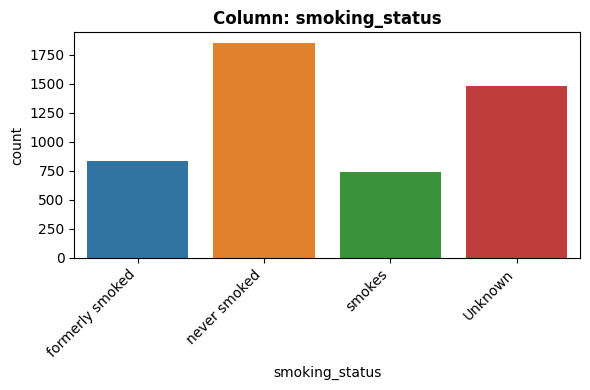

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'never smoked' occurs 1852 times (37.73%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: smoking_status'}, xlabel='smoking_status', ylabel='count'>)

In [286]:
explore_categorical(df_stroke, 'smoking_status')

##### Numeric Columns

###### EDA function for Numeric Columns

In [287]:
#Using EDA function from the LP
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

###### 'age'

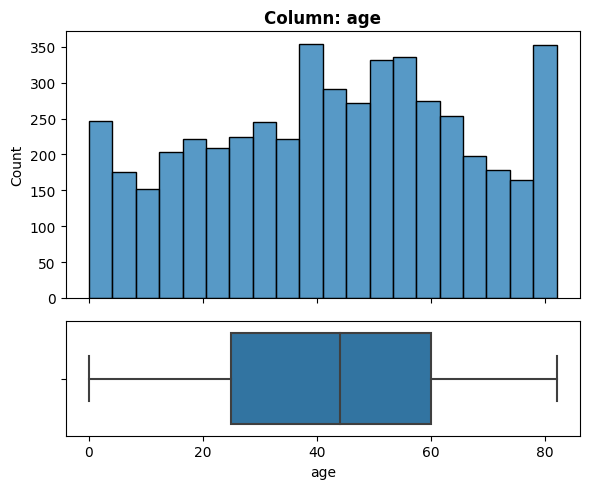

- NaN's Found: 0 (0.0%)


In [288]:
explore_numeric(df_stroke, 'age')

###### 'hypertension'

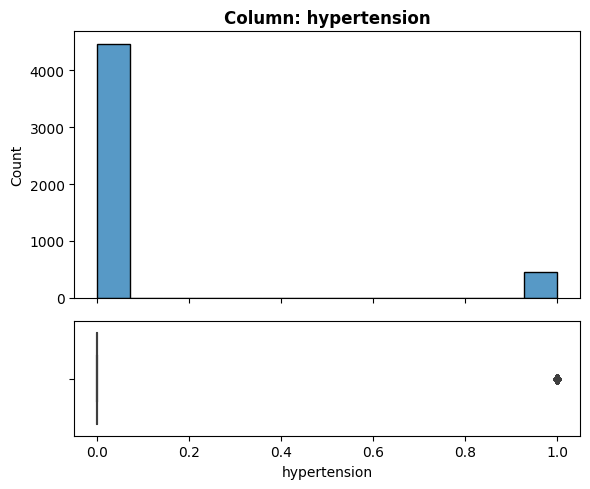

- NaN's Found: 0 (0.0%)


In [289]:
explore_numeric(df_stroke, 'hypertension')

###### 'heart_disease'

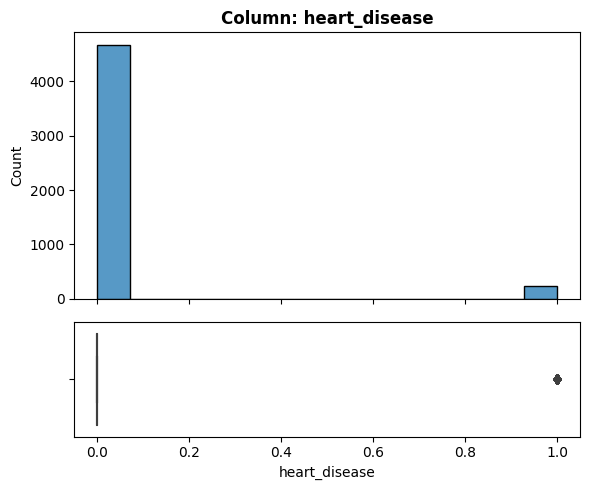

- NaN's Found: 0 (0.0%)


In [290]:
explore_numeric(df_stroke, 'heart_disease')

###### 'avg_glucose_level'

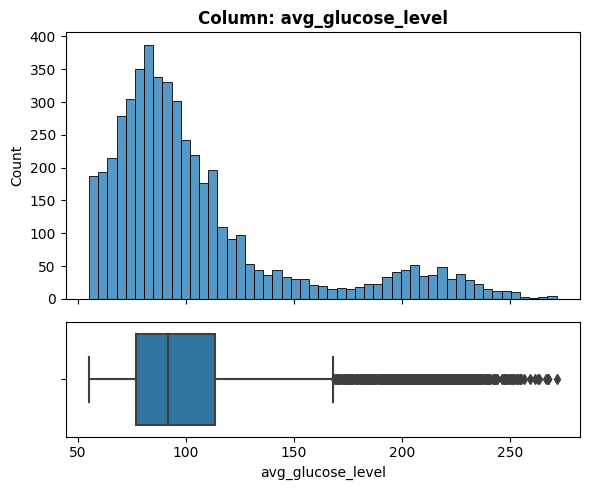

- NaN's Found: 0 (0.0%)


In [291]:
explore_numeric(df_stroke, 'avg_glucose_level')

###### 'bmi'

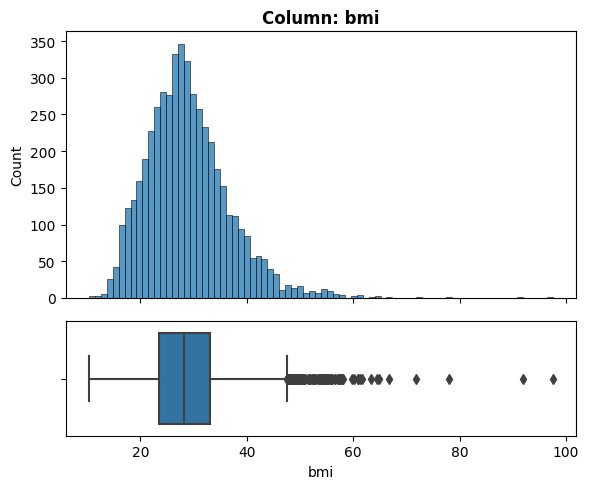

- NaN's Found: 0 (0.0%)


In [292]:
explore_numeric(df_stroke, 'bmi')

###### 'stroke'

In [293]:
df_stroke['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

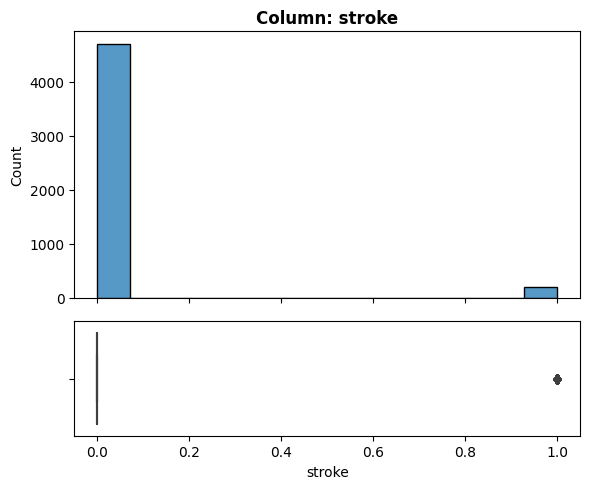

- NaN's Found: 0 (0.0%)


In [294]:
explore_numeric(df_stroke, 'stroke')

###**Correlation**

####.corr() method

In [295]:
#To check all numeric features in the dataframe for correlations, use df.corr()
corr = df_stroke.corr()

corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000


####Heatmap of Correlations

- Heatmap of correlations will display any correlation between numeric features.

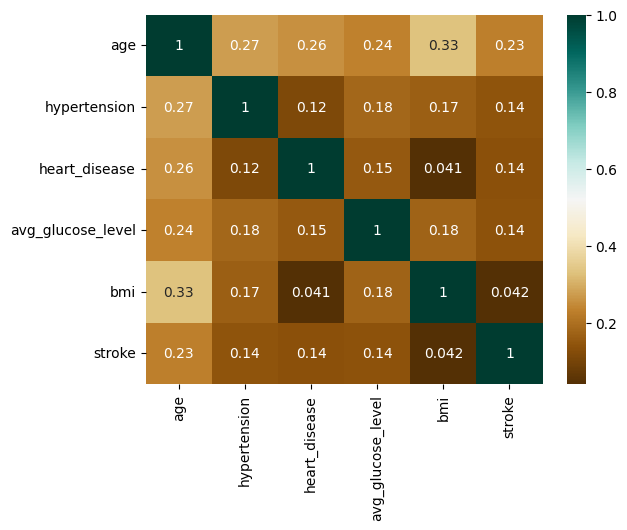

In [296]:
##Define Matplotlib fix and ax objects using plt.subplots()
## Use figsize= to set the size of the figure
fig, ax = plt.subplots()

##Define Matplotlib ax object using sns.heatmap()
##Use cmap= to define the color map
##Use annot= to annotate the correlation values
ax = sns.heatmap(corr, cmap = 'BrBG', annot = True);

Interpretation of Heatmap:
  - The highest correlation is between 'bmi' and 'age'.
  - I also notice that all features seem to have a high correlation to 'age'.

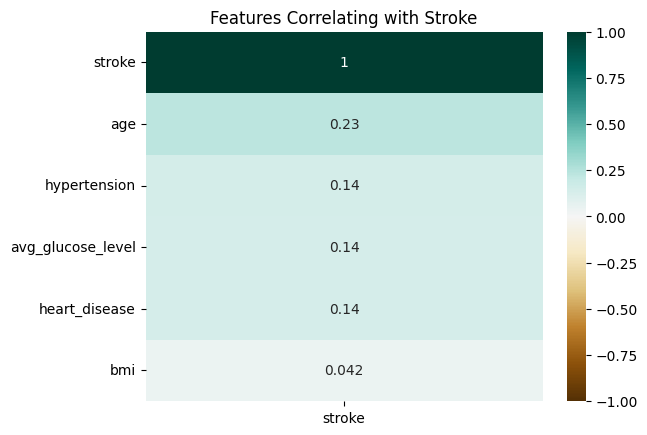

In [297]:
#Correlation of stroke with features.
#Code Source: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
heatmap = sns.heatmap(df_stroke.corr()[['stroke']].sort_values(by='stroke', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Stroke');

- Age and Stroke have the highest correlation at 23%, followed by hypertension, avg_glucose_level, heart_disease all 3 features with 14 % correlation.

# **Explanatory Data Analysis**


##How does Age and BMI correlate to suffering from a stroke?


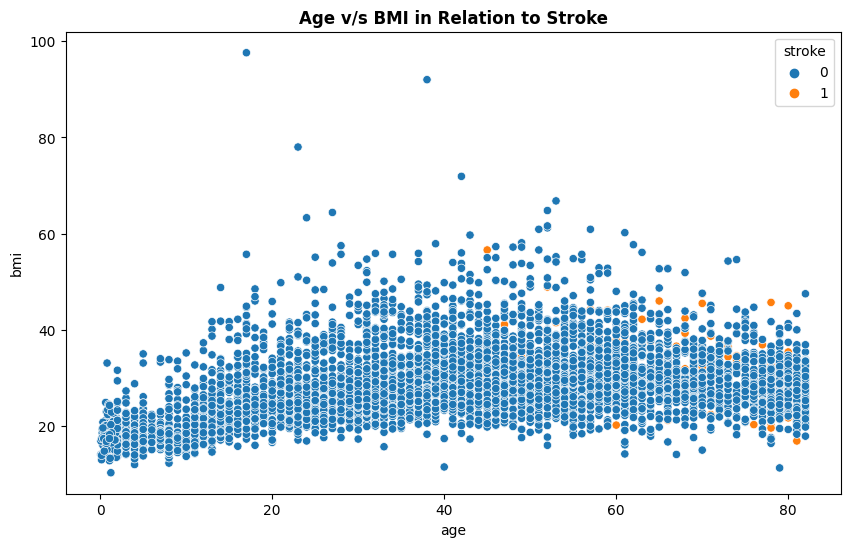

In [298]:
#Plotting Age and BMI values in relation to stroke.
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(df_stroke, x="age", y="bmi", hue="stroke")
ax.set_title("Age v/s BMI in Relation to Stroke", fontweight="bold");

**Observations**
  - Majority of the people who suffer from a stroke are those who are 60 years and older.

##How does Age and Hypertension correlate to suffering from a stroke?

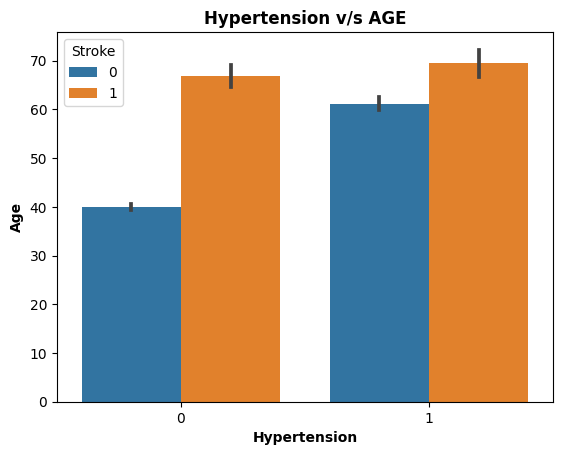

In [299]:
## Define MatplotLib fig and ax objects using plt.subplots()
fig, ax = plt.subplots()

## Define a MatplotLib ax object using sns.barplot()
ax = sns.barplot(data = df_stroke,
                 x= 'hypertension',
                 y='age', hue='stroke')

## Set the Title
ax.set_title('Hypertension v/s AGE', fontsize=12, fontweight='bold')
## Set the X axis label
ax.set_xlabel('Hypertension', fontsize=10, fontweight='bold')
## Set the Y axis label
ax.set_ylabel('Age', fontsize=10, fontweight='bold')
## Plot Legend
plt.legend(title='Stroke')
plt.show()
## Set the legend location to [1,1]
ax.legend(bbox_to_anchor=[1,1]);

**Observations**
  - We can see that those people who suffered from a stroke regardless of whether they have Hypertension or not, are at an average age of 65 years and older.

##How does Heart Disease relate to suffering from a stroke?

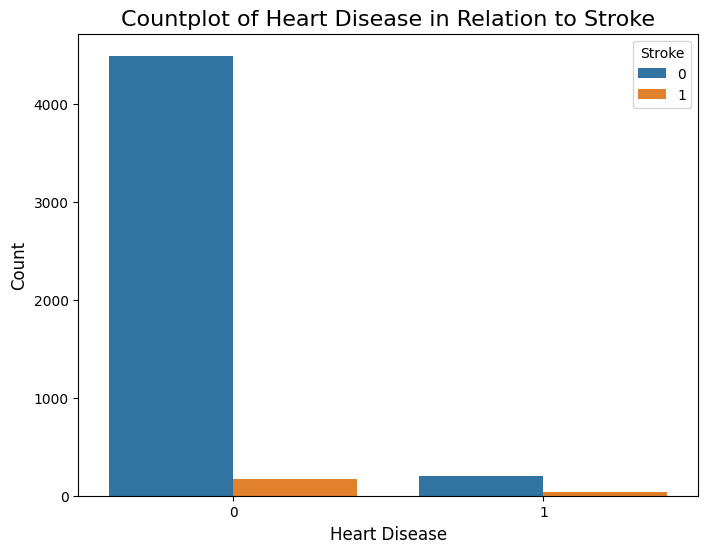

In [300]:
plt.figure(figsize=(8, 6))
sns.countplot(x='heart_disease', hue='stroke', data=df_stroke)
plt.xlabel('Heart Disease', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Countplot of Heart Disease in Relation to Stroke', fontsize=16)
plt.legend(title='Stroke')
plt.show()

**Observations**
- As expected those with no heart disease have a higher count of not suffering from a stroke.
- However, the least count showed up for those who have heart disease and suffered from a strok.

##How does Work Type relate to suffering from a stroke?

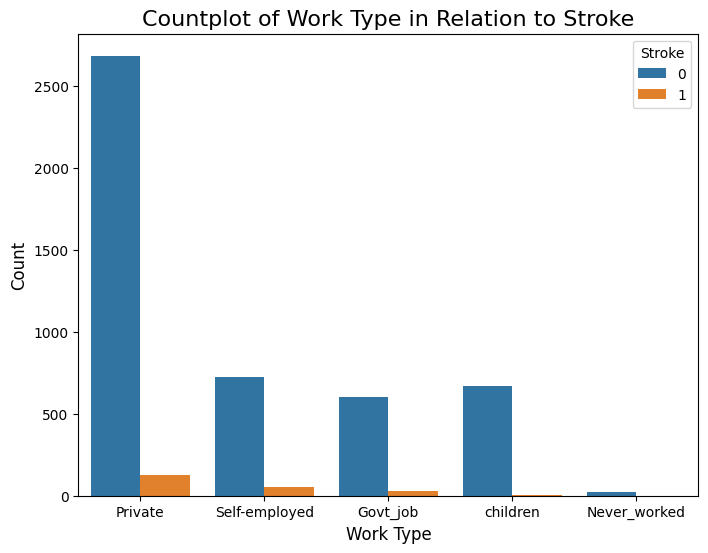

In [301]:
plt.figure(figsize=(8, 6))
sns.countplot(x='work_type', hue='stroke', data=df_stroke)
plt.xlabel('Work Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Countplot of Work Type in Relation to Stroke', fontsize=16)
plt.legend(title='Stroke')
plt.show()

**Observations**
- Those working in the private sector are more like to suffer from a stroke.

##How does Smoking Status relate to suffering from a stroke?

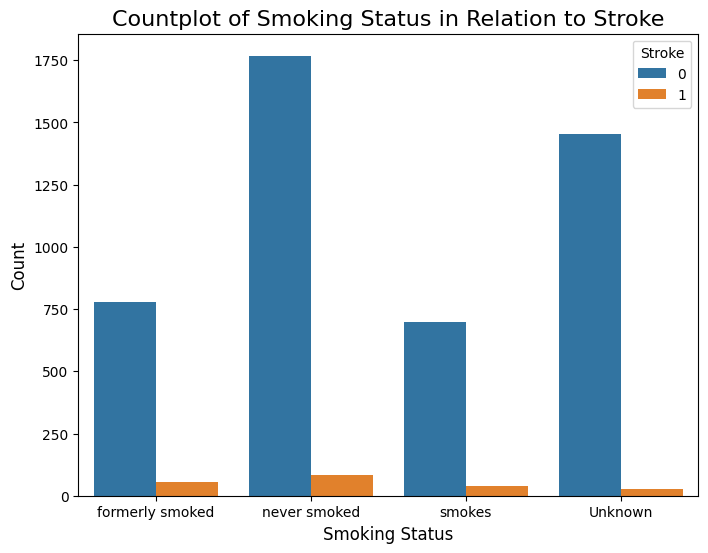

In [302]:
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking_status', hue='stroke', data=df_stroke)
plt.xlabel('Smoking Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Countplot of Smoking Status in Relation to Stroke', fontsize=16)
plt.legend(title='Stroke')
plt.show()

**Observations**
- Surprisingly, the highest count is for those who suffer from a stroke are those who are non-smokers.

#**Preprocessing for Machine Learning**

This is data is suitable for classification model.
  - I will begin by importing all the neccassary imports first.

In [303]:
#Creating a copy of dataframe for Machine Learning
df_ml = df_stroke.copy()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [304]:
#IMPORTS for Machine Learning
## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

## Set global scikit-learn configuration
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

#CLASSIFICATION METRIX
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay,
                             PrecisionRecallDisplay, RocCurveDisplay,
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline as make_sampler_pipeline


In [305]:
#I am using the custom function used in the code along- ROC AUC to evaluate the classification metrics.

## Create a function to display the classification metrics of a model
def classification_metrics(model, X_test, y_test, label='Test Data',
                             figsize=(15,5), normalize='true',
                             cmap='Greens', thresh=.5):

    fig, axes = plt.subplots(1,2, figsize=figsize)

    ## Get the predictions
    y_proba = model.predict_proba(X_test)
    y_pred = [1 if x[1] > thresh else 0 for x in y_proba]

    ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred,
                normalize=normalize, cmap=cmap,
                ax=axes[0])

    RocCurveDisplay.from_estimator(model, X_test, y_test,
                                   ax=axes[1])
    plt.show()

##**Data Consistency**

### **Data Consistency- Categorical Columns**




In [306]:
# save list of categorical column name.
categorical_col = df_ml.select_dtypes('object').columns
categorical_col

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [307]:
# Check for nunique for categorical columns
for col in categorical_col:
  print(f'Value Counts for {col}')
  print(df_ml[col].value_counts())
  print('\n')

Value Counts for gender
Female    2897
Male      2011
Other        1
Name: gender, dtype: int64


Value Counts for ever_married
Yes    3204
No     1705
Name: ever_married, dtype: int64


Value Counts for work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64


Value Counts for Residence_type
Urban    2490
Rural    2419
Name: Residence_type, dtype: int64


Value Counts for smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64




In [308]:
df_ml[df_ml['gender'] == 'Other'].index[0]

3116

In [309]:
df_ml.drop(3116, inplace=True)

In [310]:
df_ml['gender'].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

###**Data Consistency- Numerical Columns**

In [311]:
# Have list of numerical column name.
numerical_col = df_ml.select_dtypes(['int', 'float']).columns
numerical_col

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [312]:
# check for nunique for numerical columns
for col in numerical_col:
  print(f'Value Counts for {col}')
  print(df_ml[col].value_counts())
  print('\n')

Value Counts for age
57.00    93
78.00    93
52.00    85
54.00    84
51.00    83
         ..
1.40      3
0.16      3
0.40      2
0.08      2
0.48      2
Name: age, Length: 104, dtype: int64


Value Counts for hypertension
0    4457
1     451
Name: hypertension, dtype: int64


Value Counts for heart_disease
0    4665
1     243
Name: heart_disease, dtype: int64


Value Counts for avg_glucose_level
93.88     6
73.00     5
91.68     5
91.85     5
72.49     5
         ..
137.45    1
72.06     1
97.90     1
230.59    1
85.28     1
Name: avg_glucose_level, Length: 3851, dtype: int64


Value Counts for bmi
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64


Value Counts for stroke
0    4699
1     209
Name: stroke, dtype: int64




In [313]:
df_ml.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [314]:
#Check and Drop null values in target column stroke
df_ml['stroke'].isna().sum()

0

- There are 0 null values in target column.

##**Defining X and y**

### Define X and y

In [315]:
## Define X and y
target = 'stroke'

X = df_ml.drop(columns=target)
y = df_ml[target]
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked


####Train-Test-Split

In [316]:
# Perfoming a train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [317]:
X_train.shape

(3681, 10)

###Check Class Balance

In [318]:
y_train.value_counts()

0    3535
1     146
Name: stroke, dtype: int64

In [319]:
y_test.value_counts()

0    1164
1      63
Name: stroke, dtype: int64

###Numeric Transformation

In [320]:
#Using median stratergy to impute missing values for numeric columns

#Column Selector
num_col = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_col)

#Transformers
scaler = StandardScaler()

#Pipeline
num_pipe = make_pipeline(scaler)

#Tuple
num_tuple = ('numeric', num_pipe, num_col)

Numeric Columns: Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')


In [321]:
num_pipe.fit(X_train[num_col])
X_train_num_tf = num_pipe.transform(X_train[num_col])
X_test_num_tf = num_pipe.transform(X_test[num_col])

###Nominal Transformation

In [322]:
#Nominal Category
nom_col = X_train.select_dtypes('object').columns

#Transformers
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

#Pipeline
ohe_pipe = make_pipeline(ohe)

#Tuple
ohe_tuple = ('categorical', ohe_pipe, nom_col)

In [323]:
ohe_pipe.fit(X_train[nom_col])
X_train_ohe_tf = ohe_pipe.transform(X_train[nom_col])
X_test_ohe_tf = ohe_pipe.transform(X_test[nom_col])


In [324]:
#Re-combining training data
X_train_tf = pd.concat([X_train_num_tf, X_train_ohe_tf], axis=1)
X_test_tf = pd.concat([X_test_num_tf, X_test_ohe_tf], axis=1)

###Column Transformer

##Model Evaluation

In [325]:
#Instantiate Column Transformer
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

In [326]:
col_transformer.fit_transform(X_train)
col_transformer.transform(X_test)

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4857,-0.485458,-0.317973,-0.227408,-0.065821,0.443781,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3709,-0.040408,-0.317973,-0.227408,-0.473437,0.328512,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
964,1.027712,3.144922,-0.227408,-0.679047,0.418166,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2971,-0.975013,-0.317973,-0.227408,-0.765524,-0.452758,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3262,0.182117,-0.317973,-0.227408,-0.372997,-0.849797,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-1.895376,-0.317973,-0.227408,-0.705846,-1.618259,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4458,-1.776103,-0.317973,-0.227408,0.115917,-0.901028,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
38,0.671672,-0.317973,-0.227408,-0.279988,0.405358,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2975,-0.440953,-0.317973,-0.227408,0.205097,1.852629,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


###Logistic Regression

In [327]:
lr = LogisticRegression(random_state=42)
lr_pipe = make_pipeline(col_transformer, lr)
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(random_state=42))])

In [328]:
#Save the model's predictions for the train dataset
lr_train_preds = lr_pipe.predict(X_train)

#Save the model's predictions for the test dataset
lr_test_preds = lr_pipe.predict(X_test)

In [329]:
labels = ['No Stroke', 'Stroke']
print('Train Report')
print(classification_report(y_train, lr_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, lr_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

   No Stroke       0.96      1.00      0.98      3535
      Stroke       1.00      0.01      0.01       146

    accuracy                           0.96      3681
   macro avg       0.98      0.50      0.50      3681
weighted avg       0.96      0.96      0.94      3681

Test Report
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1164
      Stroke       0.00      0.00      0.00        63

    accuracy                           0.95      1227
   macro avg       0.47      0.50      0.49      1227
weighted avg       0.90      0.95      0.92      1227



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3535
           1       0.24      0.18      0.20       146

    accuracy                           0.94      3681
   macro avg       0.60      0.58      0.59      3681
weighted avg       0.94      0.94      0.94      3681



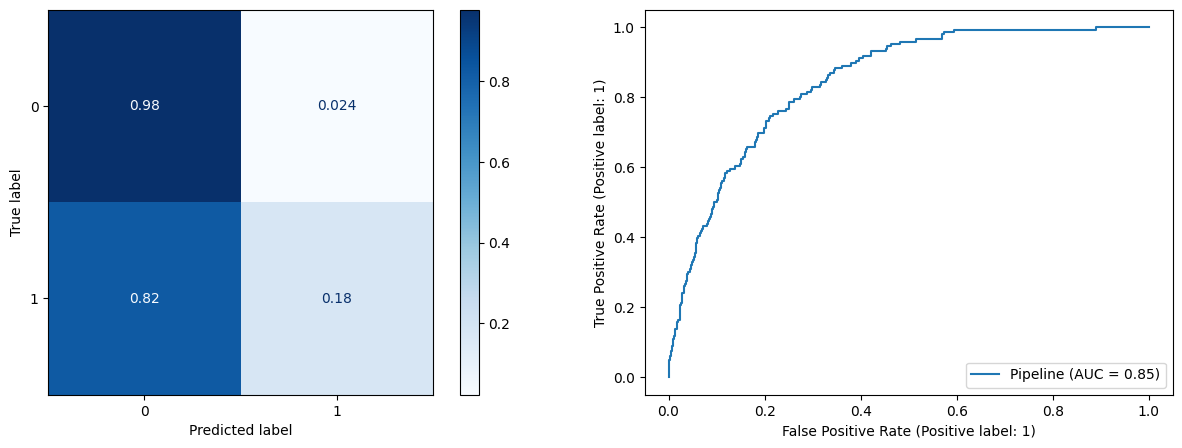

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1164
           1       0.29      0.19      0.23        63

    accuracy                           0.93      1227
   macro avg       0.62      0.58      0.60      1227
weighted avg       0.92      0.93      0.93      1227



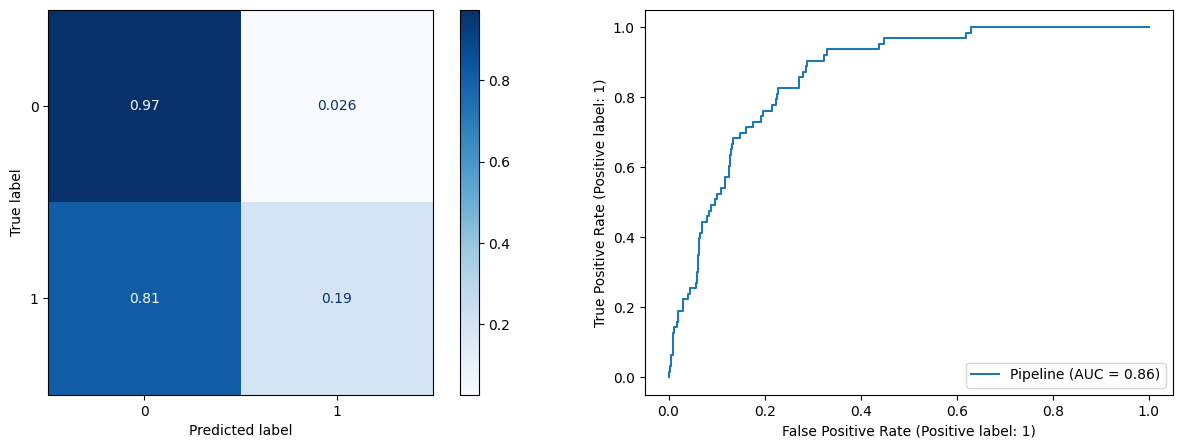

In [330]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(lr_pipe, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(lr_pipe, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')

###Logistic Regression- SMOTE

In [331]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
lr_smote = LogisticRegression(random_state=42)
lr_smote_pipe = make_sampler_pipeline(col_transformer, scaler, smote, lr_smote)

#Fit and evaluate the model pipeline
lr_smote_pipe.fit(X_train, y_train)
lr_smote_test_preds = lr_smote_pipe.predict(X_test)

In [332]:
labels = ['No Stroke', 'Stroke']
print('Train Report')
print(classification_report(y_train, lr_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, lr_smote_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

   No Stroke       0.96      1.00      0.98      3535
      Stroke       1.00      0.01      0.01       146

    accuracy                           0.96      3681
   macro avg       0.98      0.50      0.50      3681
weighted avg       0.96      0.96      0.94      3681

Test Report
              precision    recall  f1-score   support

   No Stroke       0.99      0.75      0.85      1164
      Stroke       0.14      0.79      0.25        63

    accuracy                           0.75      1227
   macro avg       0.57      0.77      0.55      1227
weighted avg       0.94      0.75      0.82      1227



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.51      0.68      3535
           1       0.08      0.96      0.14       146

    accuracy                           0.53      3681
   macro avg       0.54      0.74      0.41      3681
weighted avg       0.96      0.53      0.66      3681



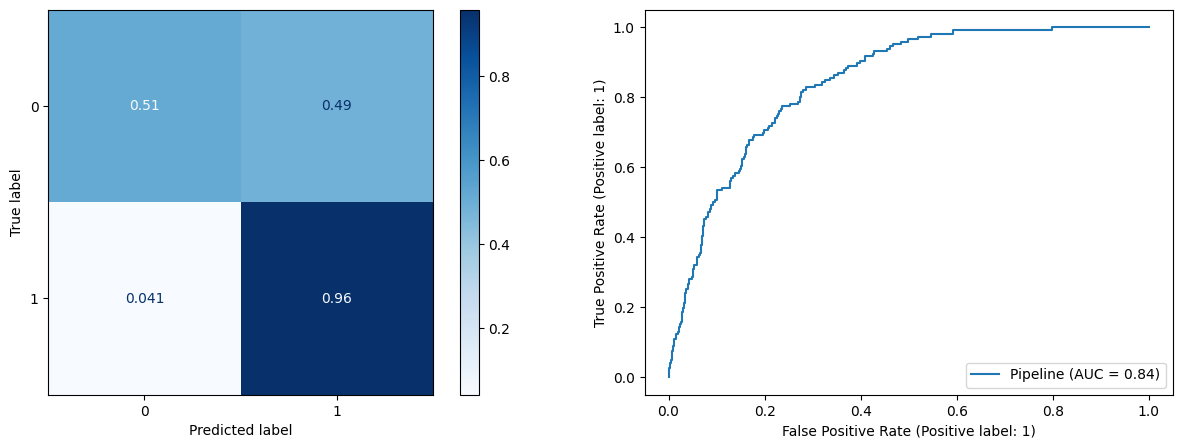

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.52      0.69      1164
           1       0.10      0.97      0.18        63

    accuracy                           0.55      1227
   macro avg       0.55      0.75      0.43      1227
weighted avg       0.95      0.55      0.66      1227



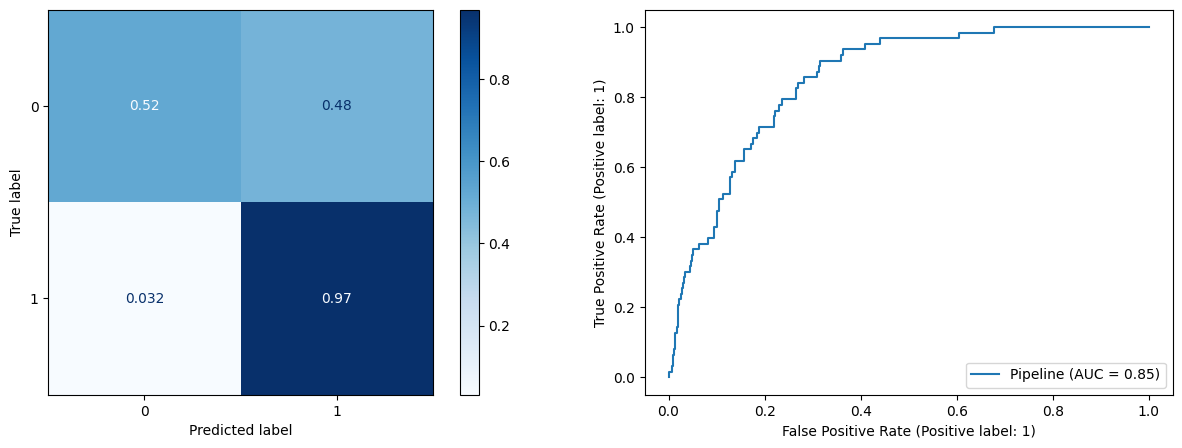

In [333]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(lr_smote_pipe, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(lr_smote_pipe, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')

####Tune Hyperparameters

In [ ]:
#Display the hyperparameters
lr_smote_pipe.get_params()

In [335]:
#Dictionary for the parameters
params = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 50, 100, 1000]}

In [336]:
#Tune hyperparameters using GridSearchCV
lr_smote_gs = GridSearchCV(lr_smote_pipe, params)
lr_smote_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('standardscaler', StandardScaler()),
                                       ('smote', SMOTE()),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 50,
                                                   100, 1000]})

In [337]:
lr_smote_gs.best_params_

{'logisticregression__C': 1}

- Best Parameter: 50

In [338]:
best_lr_smote = lr_smote_gs.best_estimator_

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.51      0.68      3535
           1       0.08      0.96      0.14       146

    accuracy                           0.53      3681
   macro avg       0.54      0.74      0.41      3681
weighted avg       0.96      0.53      0.66      3681



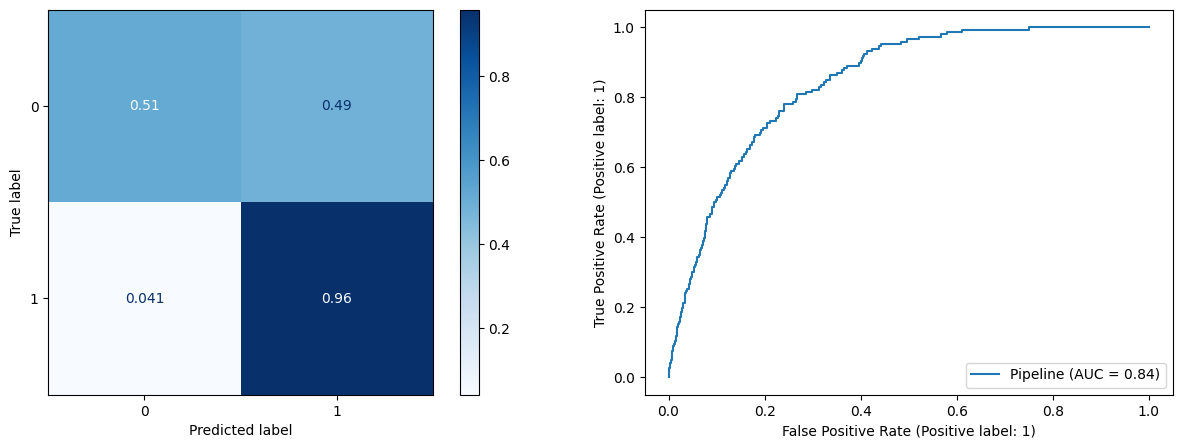

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.53      0.69      1164
           1       0.10      0.97      0.18        63

    accuracy                           0.55      1227
   macro avg       0.55      0.75      0.44      1227
weighted avg       0.95      0.55      0.67      1227



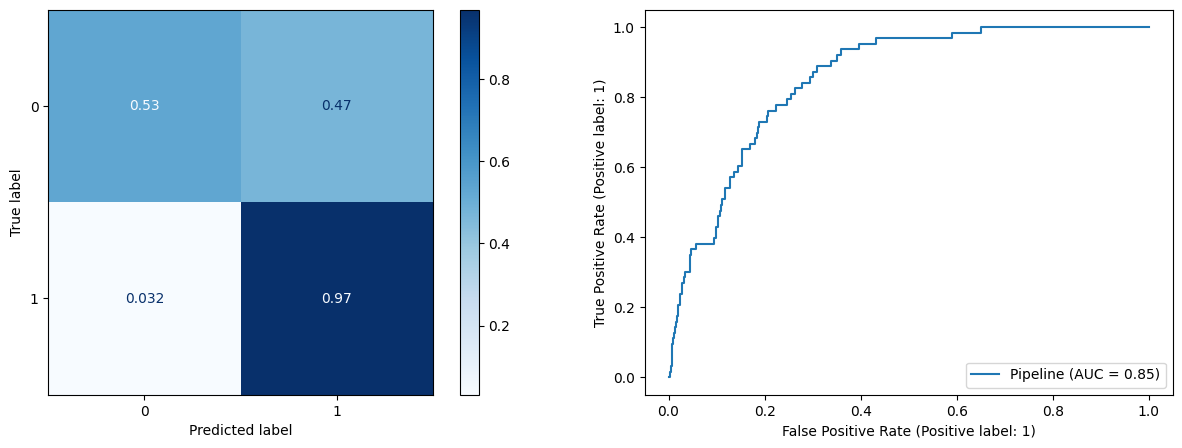

In [339]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(best_lr_smote, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(best_lr_smote, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')


###KNN

In [353]:
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(col_transformer, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [354]:
#Save the model's predictions for the train dataset
knn_train_preds = knn_pipe.predict(X_train)

#Save the model's predictions for the test dataset
knn_test_preds = knn_pipe.predict(X_test)

In [355]:
labels = ['No Stroke', 'Stroke']
print('Train Report')
print(classification_report(y_train, knn_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, knn_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

   No Stroke       0.96      1.00      0.98      3535
      Stroke       0.22      0.01      0.03       146

    accuracy                           0.96      3681
   macro avg       0.59      0.51      0.50      3681
weighted avg       0.93      0.96      0.94      3681

Test Report
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1164
      Stroke       0.33      0.02      0.03        63

    accuracy                           0.95      1227
   macro avg       0.64      0.51      0.50      1227
weighted avg       0.92      0.95      0.92      1227



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3535
           1       0.44      0.26      0.33       146

    accuracy                           0.96      3681
   macro avg       0.70      0.62      0.65      3681
weighted avg       0.95      0.96      0.95      3681



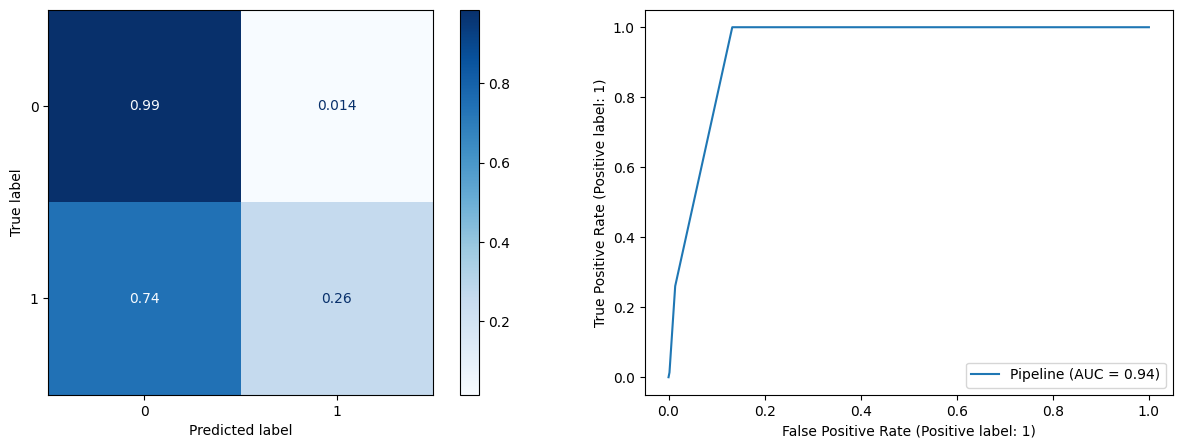

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1164
           1       0.13      0.08      0.10        63

    accuracy                           0.93      1227
   macro avg       0.54      0.53      0.53      1227
weighted avg       0.91      0.93      0.92      1227



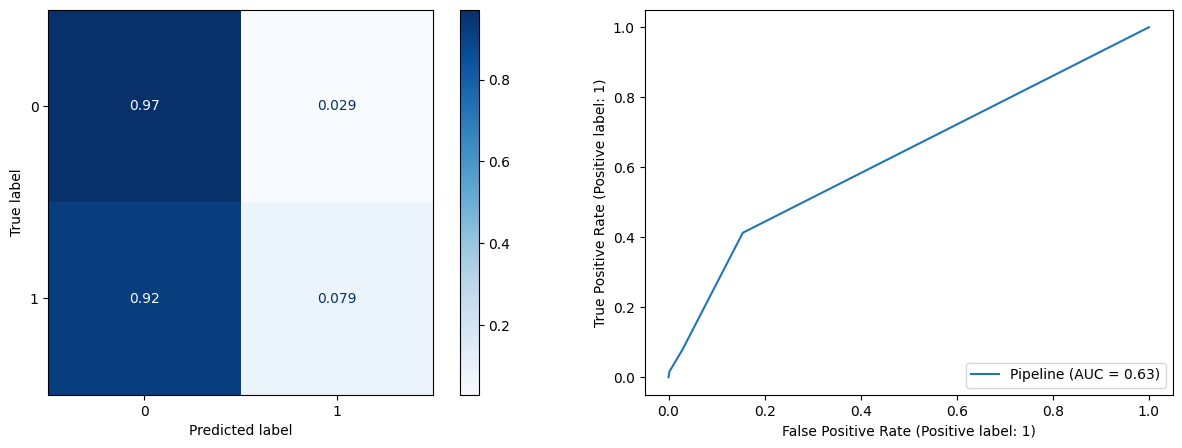

In [442]:
#Use the function twice to evaluate our model on training and test data
labels = ['No Stroke', 'Stroke']
classification_metrics(knn_pipe, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(knn_pipe, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')

###KNN- SMOTE

In [391]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
knn_smote = KNeighborsClassifier()
knn_smote_pipe = make_sampler_pipeline(col_transformer, scaler, smote, knn_smote)

#Fit and evaluate the model pipeline
knn_smote_pipe.fit(X_train, y_train)
knn_smote_test_preds = knn_smote_pipe.predict(X_test)

In [392]:
labels = ['No Stroke', 'Stroke']
print('Train Report')
print(classification_report(y_train, knn_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, knn_smote_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

   No Stroke       0.96      1.00      0.98      3535
      Stroke       0.22      0.01      0.03       146

    accuracy                           0.96      3681
   macro avg       0.59      0.51      0.50      3681
weighted avg       0.93      0.96      0.94      3681

Test Report
              precision    recall  f1-score   support

   No Stroke       0.96      0.86      0.91      1164
      Stroke       0.12      0.33      0.17        63

    accuracy                           0.84      1227
   macro avg       0.54      0.60      0.54      1227
weighted avg       0.92      0.84      0.87      1227



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      3535
           1       0.22      1.00      0.36       146

    accuracy                           0.86      3681
   macro avg       0.61      0.93      0.64      3681
weighted avg       0.97      0.86      0.90      3681



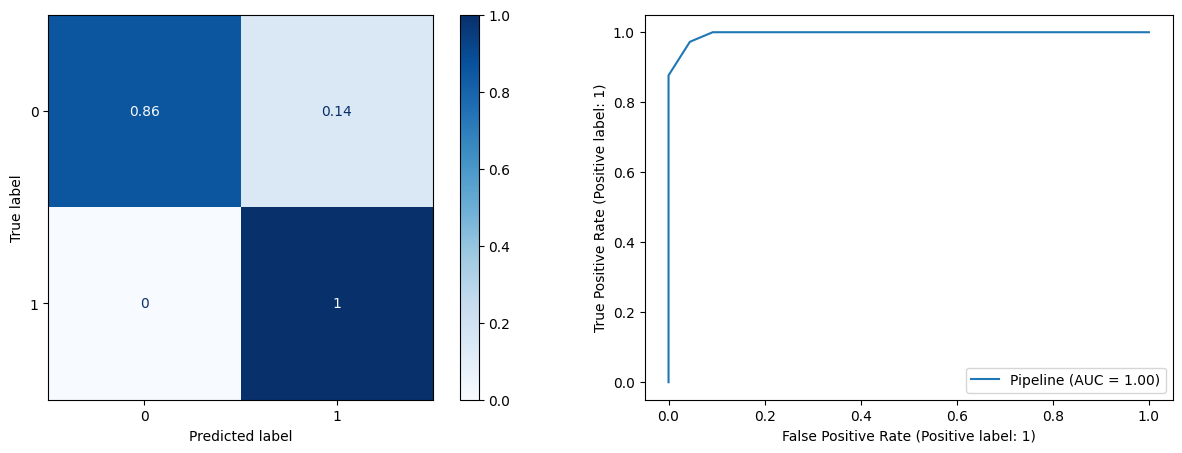

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1164
           1       0.12      0.43      0.19        63

    accuracy                           0.81      1227
   macro avg       0.54      0.63      0.54      1227
weighted avg       0.92      0.81      0.85      1227



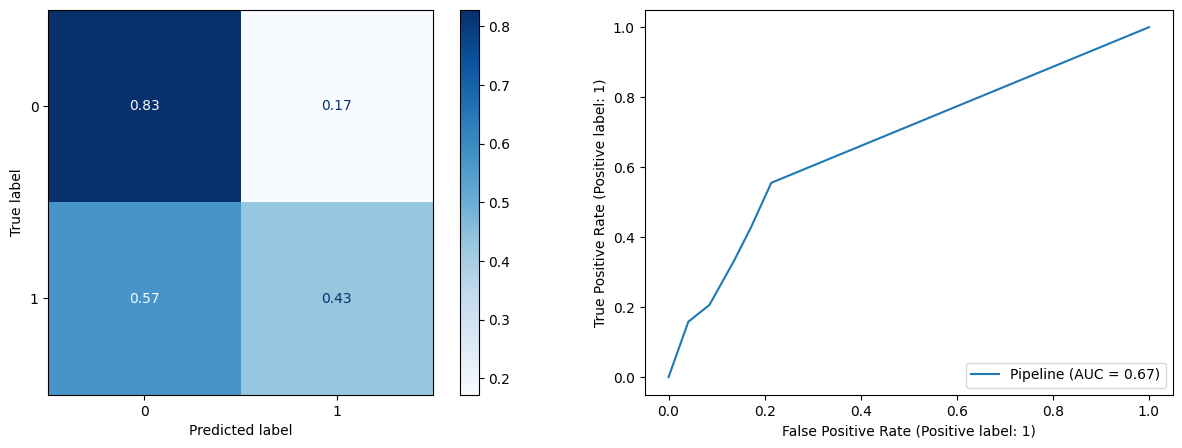

In [393]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(knn_smote_pipe, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(knn_smote_pipe, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')

#### Tune Hyperparameters

In [ ]:
#Display the hyperparameters
knn_smote_pipe.get_params()

In [395]:
#Create a dictionary of parameters
params = {'kneighborsclassifier__n_neighbors': range(1,15),
         'kneighborsclassifier__weights': ['distance', 'uniform']}

In [ ]:
#True hyperparameters with GridSearchCV
knn_smote_gs = GridSearchCV(knn_smote_pipe, params)
knn_smote_gs.fit(X_train, y_train)

In [ ]:
knn_smote_gs.best_params_

- Best Parameter -n_neighbours: 2 ; weights -'uniform'

In [404]:
knn_smote_gs.best_score_

0.9103530027726977

In [406]:
best_knn_smote = knn_smote_gs.best_estimator_

In [407]:
#Check the best parameter
#Instantiate and fit GridSearchCV
train_preds = best_knn_smote.predict(X_train)
test_preds = best_knn_smote.predict(X_test)

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      3535
           1       0.39      1.00      0.56       146

    accuracy                           0.94      3681
   macro avg       0.69      0.97      0.76      3681
weighted avg       0.98      0.94      0.95      3681



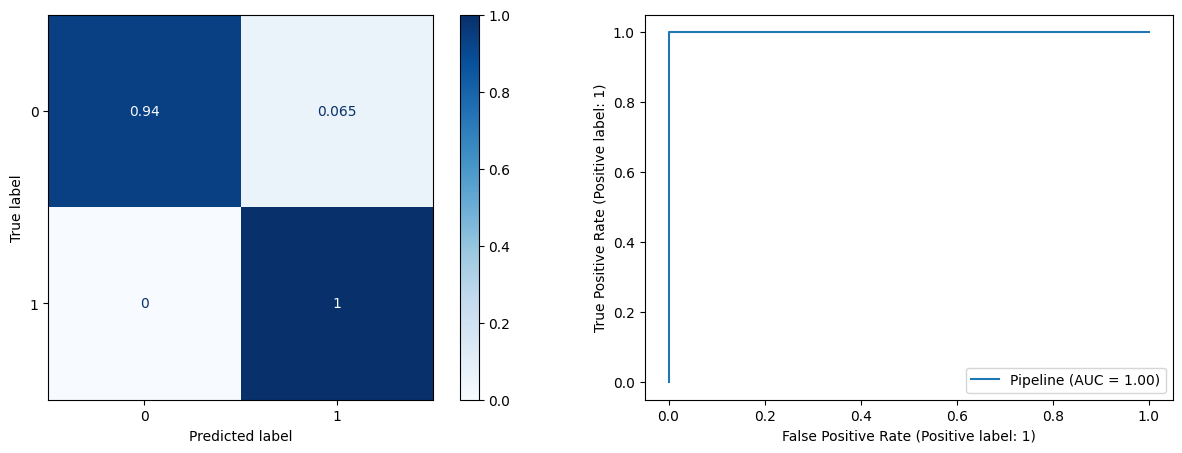

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1164
           1       0.10      0.24      0.14        63

    accuracy                           0.85      1227
   macro avg       0.53      0.56      0.53      1227
weighted avg       0.91      0.85      0.88      1227



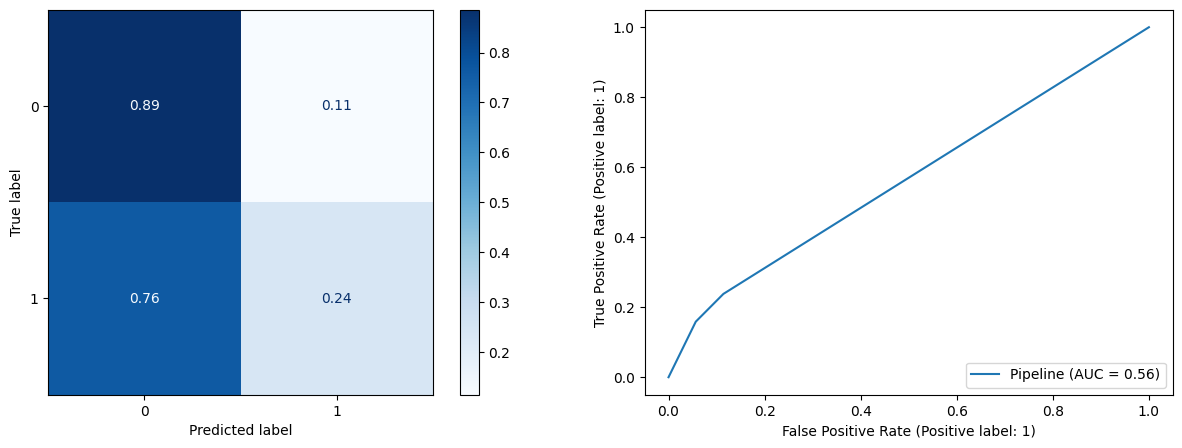

In [409]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(best_knn_smote, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(best_knn_smote, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')

###Random Forest Classifier

In [410]:
rf = RandomForestClassifier(random_state=42)
rf_pipe = make_pipeline(col_transformer, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [411]:
#Save the model's predictions for the train dataset
rf_train_preds = rf_pipe.predict(X_train)

#Save the model's predictions for the test dataset
rf_test_preds = rf_pipe.predict(X_test)

In [412]:
labels = ['No Stroke', 'Stroke']
print('Train Report')
print(classification_report(y_train, rf_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, rf_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

   No Stroke       1.00      1.00      1.00      3535
      Stroke       1.00      0.99      1.00       146

    accuracy                           1.00      3681
   macro avg       1.00      1.00      1.00      3681
weighted avg       1.00      1.00      1.00      3681

Test Report
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97      1164
      Stroke       1.00      0.03      0.06        63

    accuracy                           0.95      1227
   macro avg       0.98      0.52      0.52      1227
weighted avg       0.95      0.95      0.93      1227



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3535
           1       0.96      1.00      0.98       146

    accuracy                           1.00      3681
   macro avg       0.98      1.00      0.99      3681
weighted avg       1.00      1.00      1.00      3681



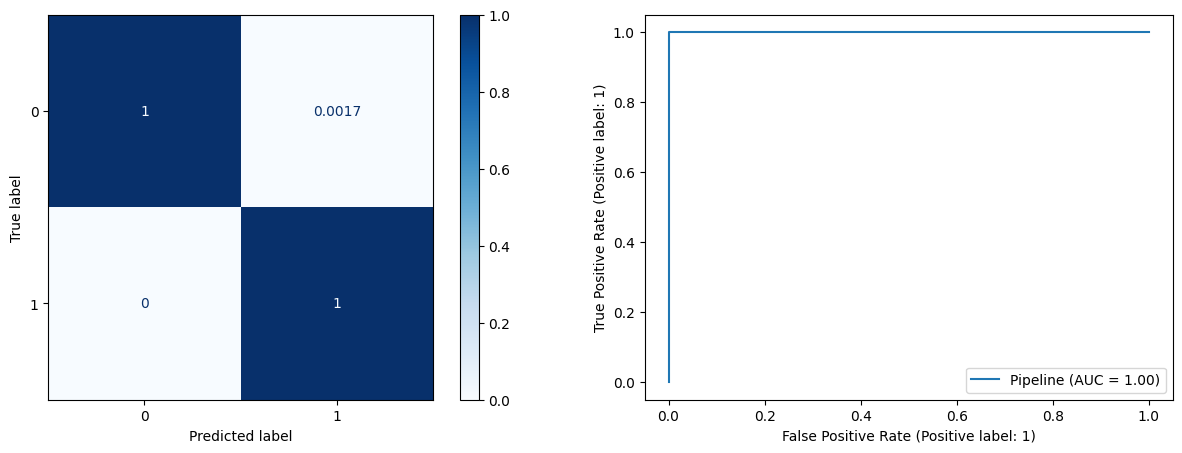

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1164
           1       0.22      0.24      0.23        63

    accuracy                           0.92      1227
   macro avg       0.59      0.60      0.59      1227
weighted avg       0.92      0.92      0.92      1227



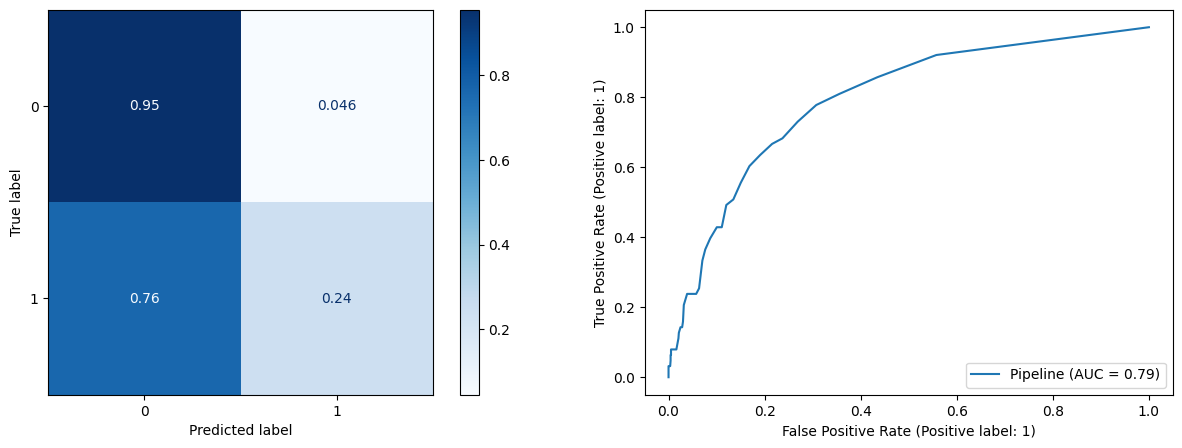

In [413]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(rf_pipe, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(rf_pipe, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')

###Random Forest Classifier- SMOTE

In [414]:
smote = SMOTE()
rf_smote = RandomForestClassifier(random_state=42)
rf_smote_pipe = make_sampler_pipeline(col_transformer, scaler, smote, rf_smote)

#Fit and evaluate the model pipeline
rf_smote_pipe.fit(X_train, y_train)
rf_smote_test_preds = rf_smote_pipe.predict(X_test)

In [415]:
labels = ['No Stroke', 'Stroke']
print('Train Report')
print(classification_report(y_train, rf_train_preds, target_names=labels))

print('Test Report')
print(classification_report(y_test, rf_smote_test_preds, target_names=labels))

Train Report
              precision    recall  f1-score   support

   No Stroke       1.00      1.00      1.00      3535
      Stroke       1.00      0.99      1.00       146

    accuracy                           1.00      3681
   macro avg       1.00      1.00      1.00      3681
weighted avg       1.00      1.00      1.00      3681

Test Report
              precision    recall  f1-score   support

   No Stroke       0.95      0.96      0.96      1164
      Stroke       0.19      0.16      0.17        63

    accuracy                           0.92      1227
   macro avg       0.57      0.56      0.57      1227
weighted avg       0.92      0.92      0.92      1227



------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      3535
           1       0.59      1.00      0.74       146

    accuracy                           0.97      3681
   macro avg       0.80      0.99      0.87      3681
weighted avg       0.98      0.97      0.98      3681



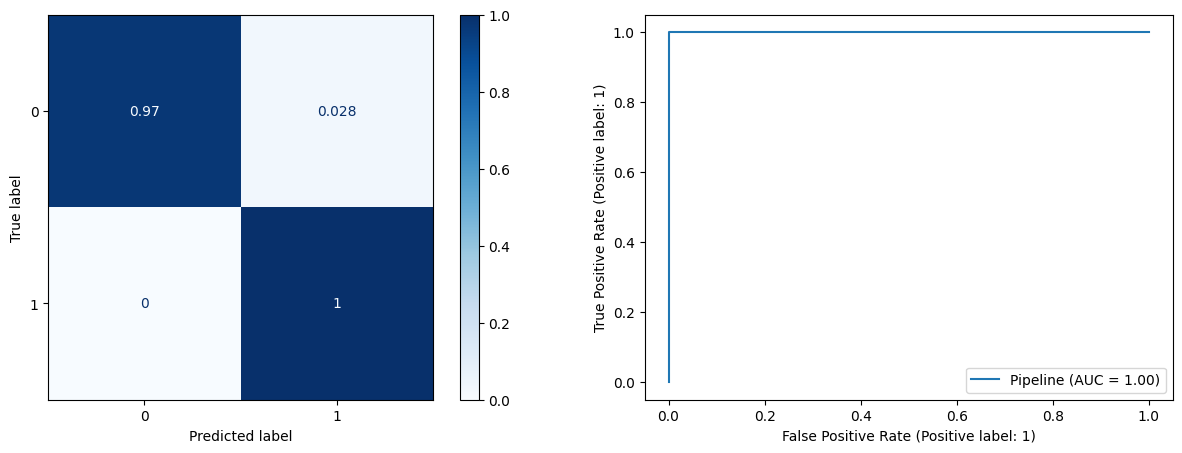

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1164
           1       0.16      0.52      0.24        63

    accuracy                           0.83      1227
   macro avg       0.56      0.69      0.57      1227
weighted avg       0.93      0.83      0.87      1227



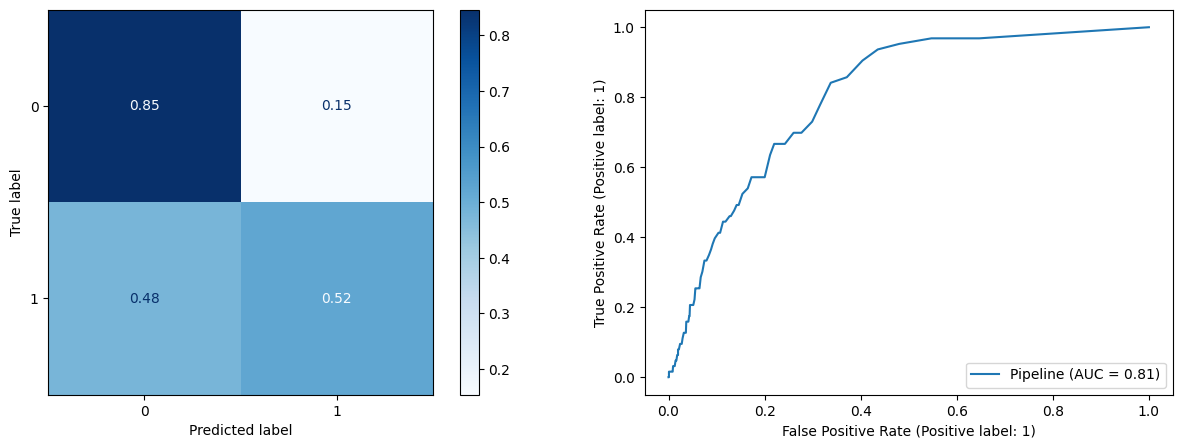

In [416]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(rf_smote_pipe, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(rf_smote_pipe, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')

####Tune Hyperparameters

In [ ]:
#Display the hyperparameters
rf_smote_pipe.get_params()

In [436]:
#Dictionary for the parameters
params = {'randomforestclassifier__n_estimators':[10, 50, 100]}

In [437]:
#Tune hyperparameters using GridSearchCV
rf_smote_gs = GridSearchCV(rf_smote_pipe, params)
rf_smote_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('standardscaler', StandardScaler()),
                                       ('smote', SMOTE()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'randomforestclassifier__n_estimators': [10, 50, 100]})

In [438]:
rf_smote_gs.best_params_

{'randomforestclassifier__n_estimators': 50}

- Best Parameter: 50

In [439]:
best_rf_smote = rf_smote_gs.best_estimator_

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      3535
           1       0.59      1.00      0.74       146

    accuracy                           0.97      3681
   macro avg       0.80      0.99      0.87      3681
weighted avg       0.98      0.97      0.98      3681



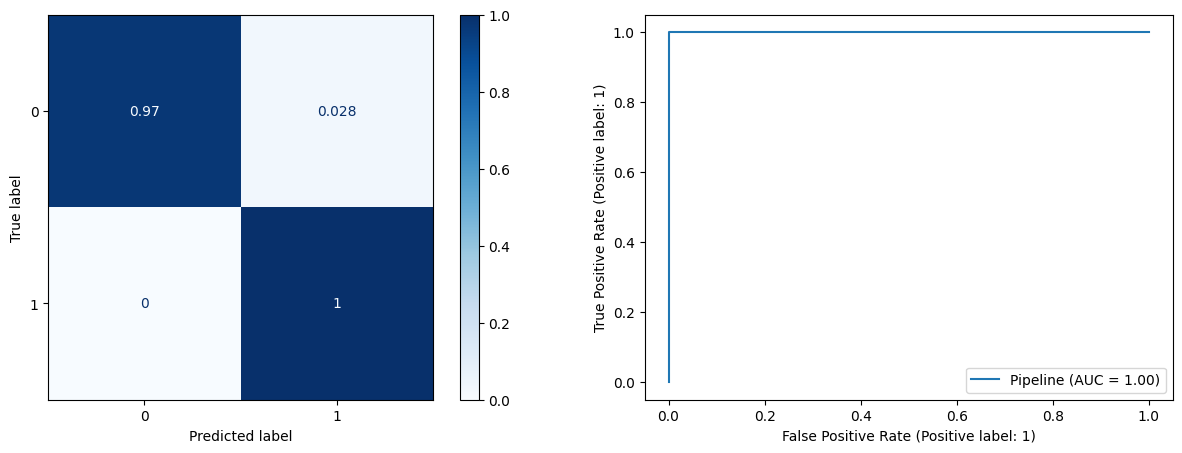

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1164
           1       0.16      0.56      0.25        63

    accuracy                           0.83      1227
   macro avg       0.57      0.70      0.58      1227
weighted avg       0.93      0.83      0.87      1227



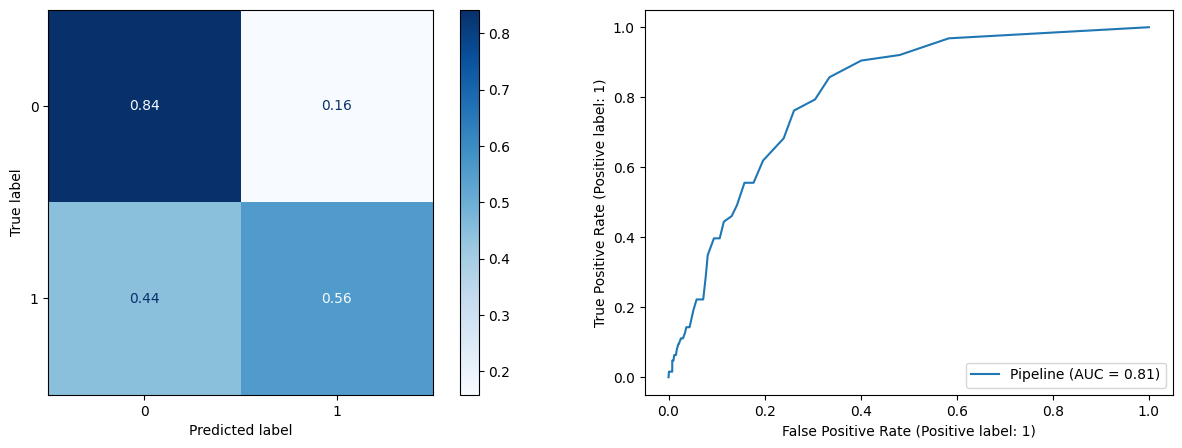

In [440]:
#Use the function twice to evaluate our model on training and test data
classification_metrics(best_rf_smote, X_train, y_train, thresh=.2,
                       cmap='Blues', label='Training Data')

classification_metrics(best_rf_smote, X_test, y_test, thresh=.2,
                       cmap='Blues', label='Test Data')
